In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import OLS
from statsmodels.api import add_constant

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [34]:
import os
os.getcwd()

'C:\\Users\\SarShel\\DEC\\Regression'

In [35]:
os.chdir('C:\\Users\\SarShel\\DEC\\Regression')
os.getcwd()

'C:\\Users\\SarShel\\DEC\\Regression'

In [36]:
# Read Classified field dataset 
FieldData0 = pd.read_csv('data_raw/ClassifiedData/FieldData_class.csv')

# Remove none values
FieldData = FieldData0.dropna()

# Display DataFrame
print(FieldData)

      Unnamed: 0         Lake Name          Y          X       Date  Year  \
0              0  Little Long Pond  40.977600 -72.296204   6/4/2016  2016   
1              1        Hatch Lake  42.834598 -75.677803   6/5/2016  2016   
2              2   Montgomery Lake  41.525299 -74.917297   6/4/2016  2016   
3              3         Dean Pond  42.447700 -76.003403   6/4/2016  2016   
4              4   Chautauqua Lake  42.219885 -79.455423   6/5/2016  2016   
...          ...               ...        ...        ...        ...   ...   
4599        4599         Long Pond  40.975102 -72.290802  7/12/2020  2020   
4600        4600         Long Pond  40.975102 -72.290802  7/26/2020  2020   
4601        4601         Long Pond  40.975102 -72.290802   8/9/2020  2020   
4602        4602         Long Pond  40.975102 -72.290802  8/23/2020  2020   
4603        4603         Long Pond  40.975102 -72.290802   9/7/2020  2020   

      Month  Day  Chl-a(ug/l)  SDD (m)  Phos (mg/l)  Chl score  SDD score  

In [37]:
# Read S2 dataset 
S2Data0 = pd.read_csv('data_raw/ClassifiedData/S2Data.csv')

# Remove none values
S2Data = S2Data0.dropna()

# Display DataFrame
print(S2Data)

       Year  Month  Day      2BDA      3BDA      NDCI        B1       B10  \
0      2016      5    7  0.956819 -0.044095 -0.022067  0.117900  0.002955   
1      2016      5    7  0.956897 -0.043909 -0.022026  0.117907  0.002955   
2      2016      5    7  1.015060  0.016807  0.007474  0.147959  0.008728   
3      2016      5    7  0.991619 -0.009014 -0.004208  0.142645  0.007528   
4      2016      5    7  0.881187 -0.110047 -0.063158  0.116655  0.002038   
...     ...    ...  ...       ...       ...       ...       ...       ...   
35028  2020     10   30  0.853926 -0.129055 -0.078792  0.152807  0.001676   
35029  2020     10   30  1.077396  0.061427  0.037256  0.126659  0.001469   
35030  2020     10   30  0.945077 -0.051659 -0.028237  0.134852  0.007321   
35031  2020     10   30  0.961857 -0.039219 -0.019442  0.132445  0.007393   
35032  2020     10   30  0.959639 -0.039047 -0.020596  0.126638  0.006003   

            B11       B12  ...        B3        B4        B5        B6  \
0

In [38]:
# Merge classified FieldData and S2Data; 
Data_class = pd.merge(FieldData, S2Data, on=['Y', 'X', 'Year', 'Month', 'Day'], how='inner')
Data_class.to_csv('data_output/ClassifiedData/Data_class.csv')

# displaying result
print(Data_class)

      Unnamed: 0          Lake Name          Y          X       Date  Year  \
0             36          Kirk Lake  41.385601 -73.749802  6/27/2016  2016   
1             36          Kirk Lake  41.385601 -73.749802  6/27/2016  2016   
2             36          Kirk Lake  41.385601 -73.749802  6/27/2016  2016   
3             39     Cazenovia Lake  42.948200 -75.872002  6/23/2016  2016   
4             39     Cazenovia Lake  42.948200 -75.872002  6/23/2016  2016   
...          ...                ...        ...        ...        ...   ...   
1088        4587  Little Fresh Pond  40.918201 -72.408501  8/30/2020  2020   
1089        4592   Little Long Pond  40.977600 -72.296204  7/26/2020  2020   
1090        4592   Little Long Pond  40.977600 -72.296204  7/26/2020  2020   
1091        4600          Long Pond  40.975102 -72.290802  7/26/2020  2020   
1092        4600          Long Pond  40.975102 -72.290802  7/26/2020  2020   

      Month  Day  Chl-a(ug/l)  SDD (m)  ...       B12        B2

In [39]:
# Return the natural logarithm of Chl-a (Y)
Data_class['LnChl-a']=np.log(Data_class['Chl-a(ug/l)'])
print(Data_class)

      Unnamed: 0          Lake Name          Y          X       Date  Year  \
0             36          Kirk Lake  41.385601 -73.749802  6/27/2016  2016   
1             36          Kirk Lake  41.385601 -73.749802  6/27/2016  2016   
2             36          Kirk Lake  41.385601 -73.749802  6/27/2016  2016   
3             39     Cazenovia Lake  42.948200 -75.872002  6/23/2016  2016   
4             39     Cazenovia Lake  42.948200 -75.872002  6/23/2016  2016   
...          ...                ...        ...        ...        ...   ...   
1088        4587  Little Fresh Pond  40.918201 -72.408501  8/30/2020  2020   
1089        4592   Little Long Pond  40.977600 -72.296204  7/26/2020  2020   
1090        4592   Little Long Pond  40.977600 -72.296204  7/26/2020  2020   
1091        4600          Long Pond  40.975102 -72.290802  7/26/2020  2020   
1092        4600          Long Pond  40.975102 -72.290802  7/26/2020  2020   

      Month  Day  Chl-a(ug/l)  SDD (m)  ...        B2        B3

In [40]:
# Select Mesoligotrophi Data 
Mesoligotrophic_data = Data_class.loc[(Data_class ['Tropic state'] == 'Mesoligotrophic')]
Mesoligotrophic_data.shape

(457, 33)

In [42]:
# Descriptive statistics of all variables
list = ['2BDA', '3BDA', 'NDCI', 'LnChl-a']

# get the summary for Mesoligotrophi Lakes
desc_Mesoligotrophic = Mesoligotrophic_data [list].describe()

# add the standard deviation metric
desc_Mesoligotrophic.loc['+3_std'] = desc_Mesoligotrophic.loc['mean'] + (desc_Mesoligotrophic.loc['std'] * 3)
desc_Mesoligotrophic.loc['-3_std'] = desc_Mesoligotrophic.loc['mean'] - (desc_Mesoligotrophic.loc['std'] * 3)

# display it
desc_Mesoligotrophic

,2BDA,3BDA,NDCI,LnChl-a
count,457.000000,457.000000,457.000000,457.000000
mean,0.965409,-0.026599,-0.019971,0.514121
std,0.099171,0.156121,0.047261,0.794778
min,0.814778,-0.183291,-0.102063,-2.995732
25%,0.902130,-0.112101,-0.051453,0.134706
50%,0.940206,-0.072467,-0.030818,0.530628
75%,0.992336,-0.010604,-0.003847,1.029619
max,1.425754,0.923198,0.175514,2.492544
+3_std,1.262920,0.441764,0.121812,2.898455
-3_std,0.667897,-0.494963,-0.161754,-1.870214


In [43]:
# Pearson Coefficient 
corr = Mesoligotrophic_data[list].corr(method='pearson')

# display the correlation matrix
display(corr)

,2BDA,3BDA,NDCI,LnChl-a
2BDA,1.000000,0.972043,0.996426,-0.080560
3BDA,0.972043,1.000000,0.950684,-0.098573
NDCI,0.996426,0.950684,1.000000,-0.072871
LnChl-a,-0.080560,-0.098573,-0.072871,1.000000


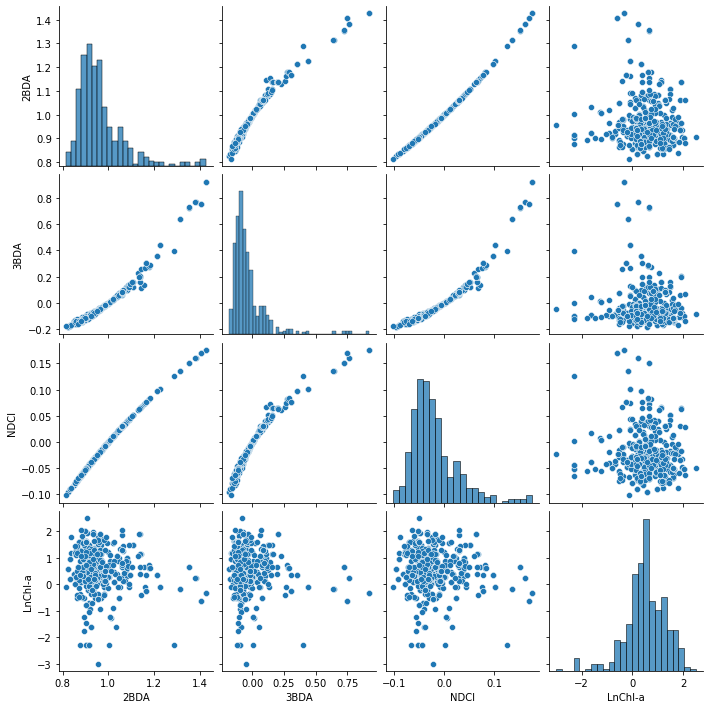

In [44]:
# Scatter plot for each variable in our dataset against another variable
sns.pairplot(Mesoligotrophic_data[list])

In [45]:
# Getting column names
X_columns = ["2BDA", "3BDA", "NDCI"]
Y = Mesoligotrophic_data["LnChl-a"]

In [46]:
#Calculate VIFs on our dataset
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(Mesoligotrophic_data[X_columns[0:3]].values, i) for i in range(Mesoligotrophic_data[X_columns[0:3]].shape[1])]
vif["features"] = Mesoligotrophic_data[X_columns[0:3]].columns

# display VIF
vif.round()

,VIF Factor,features
0,2.0,2BDA
1,11.0,3BDA
2,12.0,NDCI


In [47]:
# Extract independent variables (X) & dependent variable (Y)
X = Mesoligotrophic_data[X_columns]
X = add_constant(X)
Y = Mesoligotrophic_data['LnChl-a']

# Split X and Y into train and test 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# Create a Linear Regression model object
regression_model = OLS(Y_train,X_train)
result = OLS(Y_train,X_train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                LnChl-a   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     2.411
Date:                Mon, 07 Mar 2022   Prob (F-statistic):             0.0669
Time:                        16:01:44   Log-Likelihood:                -385.03
No. Observations:                 319   AIC:                             778.1
Df Residuals:                     315   BIC:                             793.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.1603     15.505      0.849      0.3

In [48]:
# Get predictions
LnY_predict = result.predict(X_test)
print('predicted Y:', LnY_predict)

predicted Y: 125    0.495146
344   -0.047904
782    0.531775
570    0.544989
518    0.513037
         ...   
663    0.549146
79     0.508236
457    0.548684
674    0.542149
378    0.526114
Length: 138, dtype: float64


In [49]:
import math

Y_predict = np.exp(LnY_predict)

# Calculate the mean squared error
model_mse = mean_squared_error(Y_test, Y_predict)

# Calculate the mean absolute error
model_mae = mean_absolute_error(Y_test, Y_predict)

# Calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# Display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 1.84
MAE 1.15
RMSE 1.36


In [50]:
# 2 variables model (2BDA & 3BDA)

In [52]:
list1 = ['2BDA', '3BDA', 'LnChl-a']

# get the summary for Mesoligotrophi Lakes
desc_Mesoligotrophic = Mesoligotrophic_data [list1].describe()

# add the standard deviation metric
desc_Mesoligotrophic.loc['+3_std'] = desc_Mesoligotrophic.loc['mean'] + (desc_Mesoligotrophic.loc['std'] * 3)
desc_Mesoligotrophic.loc['-3_std'] = desc_Mesoligotrophic.loc['mean'] - (desc_Mesoligotrophic.loc['std'] * 3)

# display it
desc_Mesoligotrophic

,2BDA,3BDA,LnChl-a
count,457.000000,457.000000,457.000000
mean,0.965409,-0.026599,0.514121
std,0.099171,0.156121,0.794778
min,0.814778,-0.183291,-2.995732
25%,0.902130,-0.112101,0.134706
50%,0.940206,-0.072467,0.530628
75%,0.992336,-0.010604,1.029619
max,1.425754,0.923198,2.492544
+3_std,1.262920,0.441764,2.898455
-3_std,0.667897,-0.494963,-1.870214


In [53]:
# Pearson Coefficient 
corr = Mesoligotrophic_data[list1].corr(method='pearson')

# display the correlation matrix
display(corr)

,2BDA,3BDA,LnChl-a
2BDA,1.000000,0.972043,-0.080560
3BDA,0.972043,1.000000,-0.098573
LnChl-a,-0.080560,-0.098573,1.000000


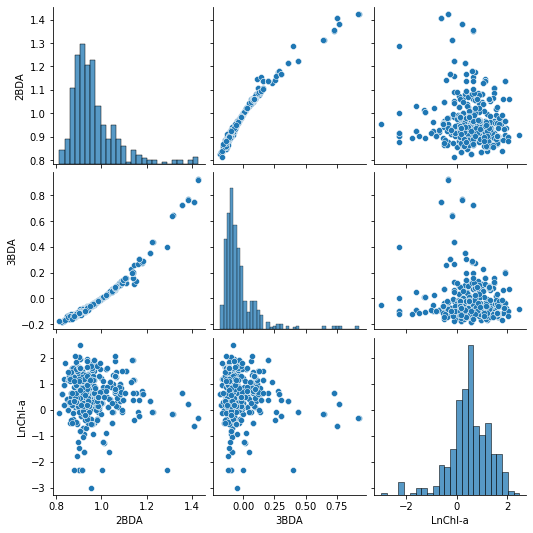

In [54]:
# Scatter plot for each variable in our dataset against another variable
sns.pairplot(Mesoligotrophic_data[list1])

In [55]:
# Getting column names
X_columns1 = ["2BDA", "3BDA"]
Y = Mesoligotrophic_data["LnChl-a"]

In [56]:
#Calculate VIFs on our dataset
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(Mesoligotrophic_data[X_columns1[0:2]].values, i) for i in range(Mesoligotrophic_data[X_columns1[0:2]].shape[1])]
vif["features"] = Mesoligotrophic_data[X_columns1[0:2]].columns

# display VIF
vif.round()

,VIF Factor,features
0,1.0,2BDA
1,1.0,3BDA


In [57]:
# Extract independent variables (X) & dependent variable (Y)
X = Mesoligotrophic_data[X_columns1]
X = add_constant(X)
Y = Mesoligotrophic_data['LnChl-a']

# Split X and Y into train and test 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# Create a Linear Regression model object
regression_model = OLS(Y_train,X_train)
result = OLS(Y_train,X_train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                LnChl-a   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     3.188
Date:                Mon, 07 Mar 2022   Prob (F-statistic):             0.0426
Time:                        16:03:18   Log-Likelihood:                -385.46
No. Observations:                 319   AIC:                             776.9
Df Residuals:                     316   BIC:                             788.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1205      1.845     -0.607      0.5

In [58]:
# 2 variables model (2BDA & NDCI)

In [60]:
list2 = ['2BDA', 'NDCI', 'LnChl-a']

# get the summary for Mesoligotrophi Lakes
desc_Mesoligotrophic = Mesoligotrophic_data [list2].describe()

# add the standard deviation metric
desc_Mesoligotrophic.loc['+3_std'] = desc_Mesoligotrophic.loc['mean'] + (desc_Mesoligotrophic.loc['std'] * 3)
desc_Mesoligotrophic.loc['-3_std'] = desc_Mesoligotrophic.loc['mean'] - (desc_Mesoligotrophic.loc['std'] * 3)

# display it
desc_Mesoligotrophic

,2BDA,NDCI,LnChl-a
count,457.000000,457.000000,457.000000
mean,0.965409,-0.019971,0.514121
std,0.099171,0.047261,0.794778
min,0.814778,-0.102063,-2.995732
25%,0.902130,-0.051453,0.134706
50%,0.940206,-0.030818,0.530628
75%,0.992336,-0.003847,1.029619
max,1.425754,0.175514,2.492544
+3_std,1.262920,0.121812,2.898455
-3_std,0.667897,-0.161754,-1.870214


In [61]:
# Pearson Coefficient 
corr = Mesoligotrophic_data[list2].corr(method='pearson')

# display the correlation matrix
display(corr)

,2BDA,NDCI,LnChl-a
2BDA,1.000000,0.996426,-0.080560
NDCI,0.996426,1.000000,-0.072871
LnChl-a,-0.080560,-0.072871,1.000000


In [62]:
# Getting column names
X_columns2 = ["2BDA", "NDCI"]
Y = Mesoligotrophic_data["LnChl-a"]

In [63]:
# Extract independent variables (X) & dependent variable (Y)
X = Mesoligotrophic_data[X_columns2]
X = add_constant(X)
Y = Mesoligotrophic_data['LnChl-a']

# Split X and Y into train and test 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# Create a Linear Regression model object
regression_model = OLS(Y_train,X_train)
result = OLS(Y_train,X_train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                LnChl-a   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     3.600
Date:                Mon, 07 Mar 2022   Prob (F-statistic):             0.0284
Time:                        16:04:35   Log-Likelihood:                -385.05
No. Observations:                 319   AIC:                             776.1
Df Residuals:                     316   BIC:                             787.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7323      5.025      1.937      0.0